In [27]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [28]:
prices = pd.read_csv('./data/abra_price.csv')
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3
0,0,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN
1,1,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN
2,2,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN
3,3,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN
4,4,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN
9996,9996,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN
9997,9997,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN
9998,9998,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN


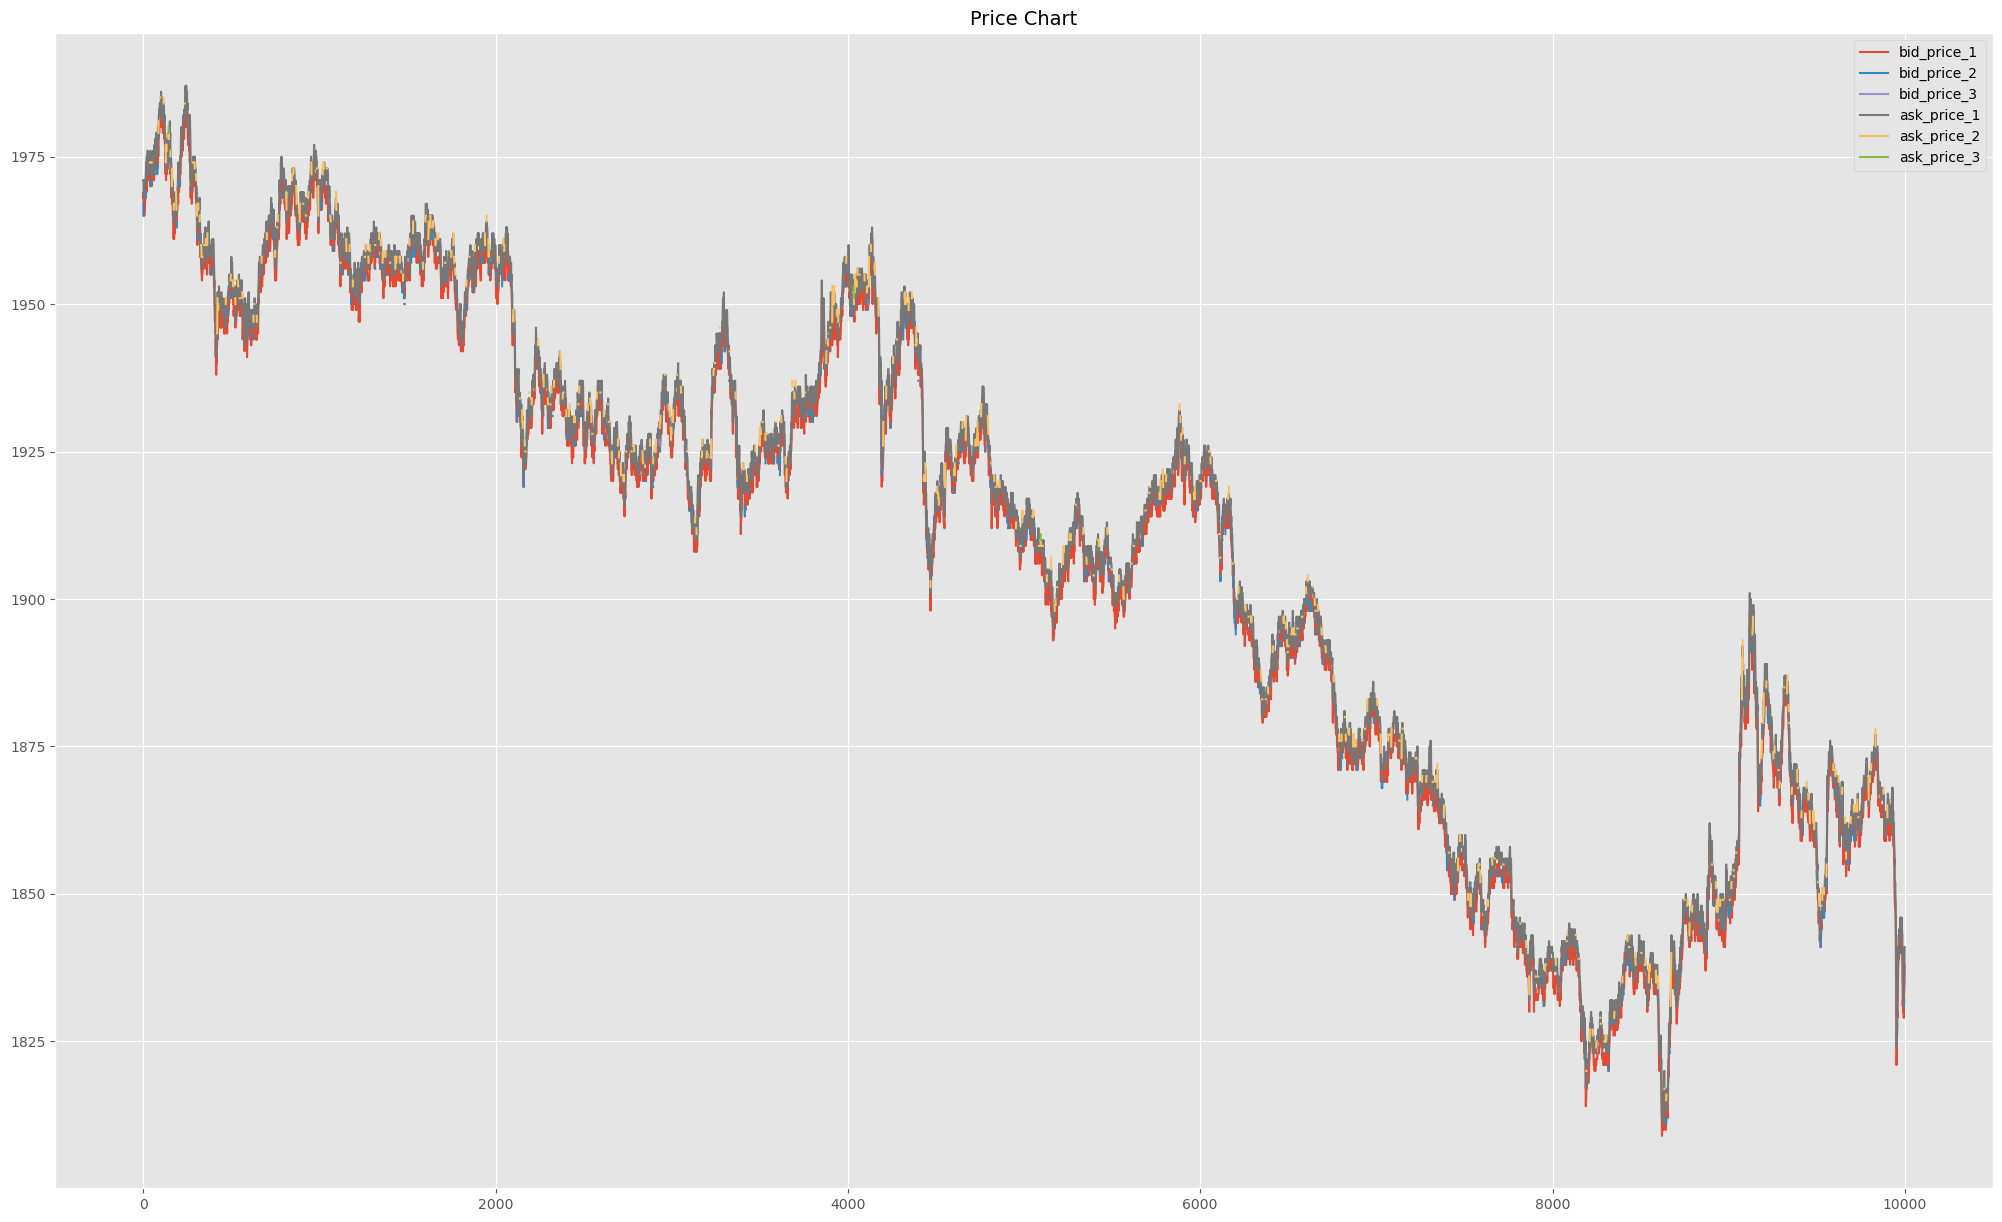

In [29]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

In [30]:
# Ensure numeric columns (in case some values are read as strings)
prices['bid_price_1'] = pd.to_numeric(prices['bid_price_1'], errors='coerce')
prices['ask_price_1'] = pd.to_numeric(prices['ask_price_1'], errors='coerce')

# Compute mid-price
prices['mid_price'] = (prices['bid_price_1'] + prices['ask_price_1']) / 2

# Calculate log returns
prices['log_return'] = np.log(prices['mid_price'] / prices['mid_price'].shift(1))

# Calculate rolling volatility (e.g., 50-timestep window)
window_size = 50
prices['volatility'] = prices['log_return'].rolling(window=window_size).std()


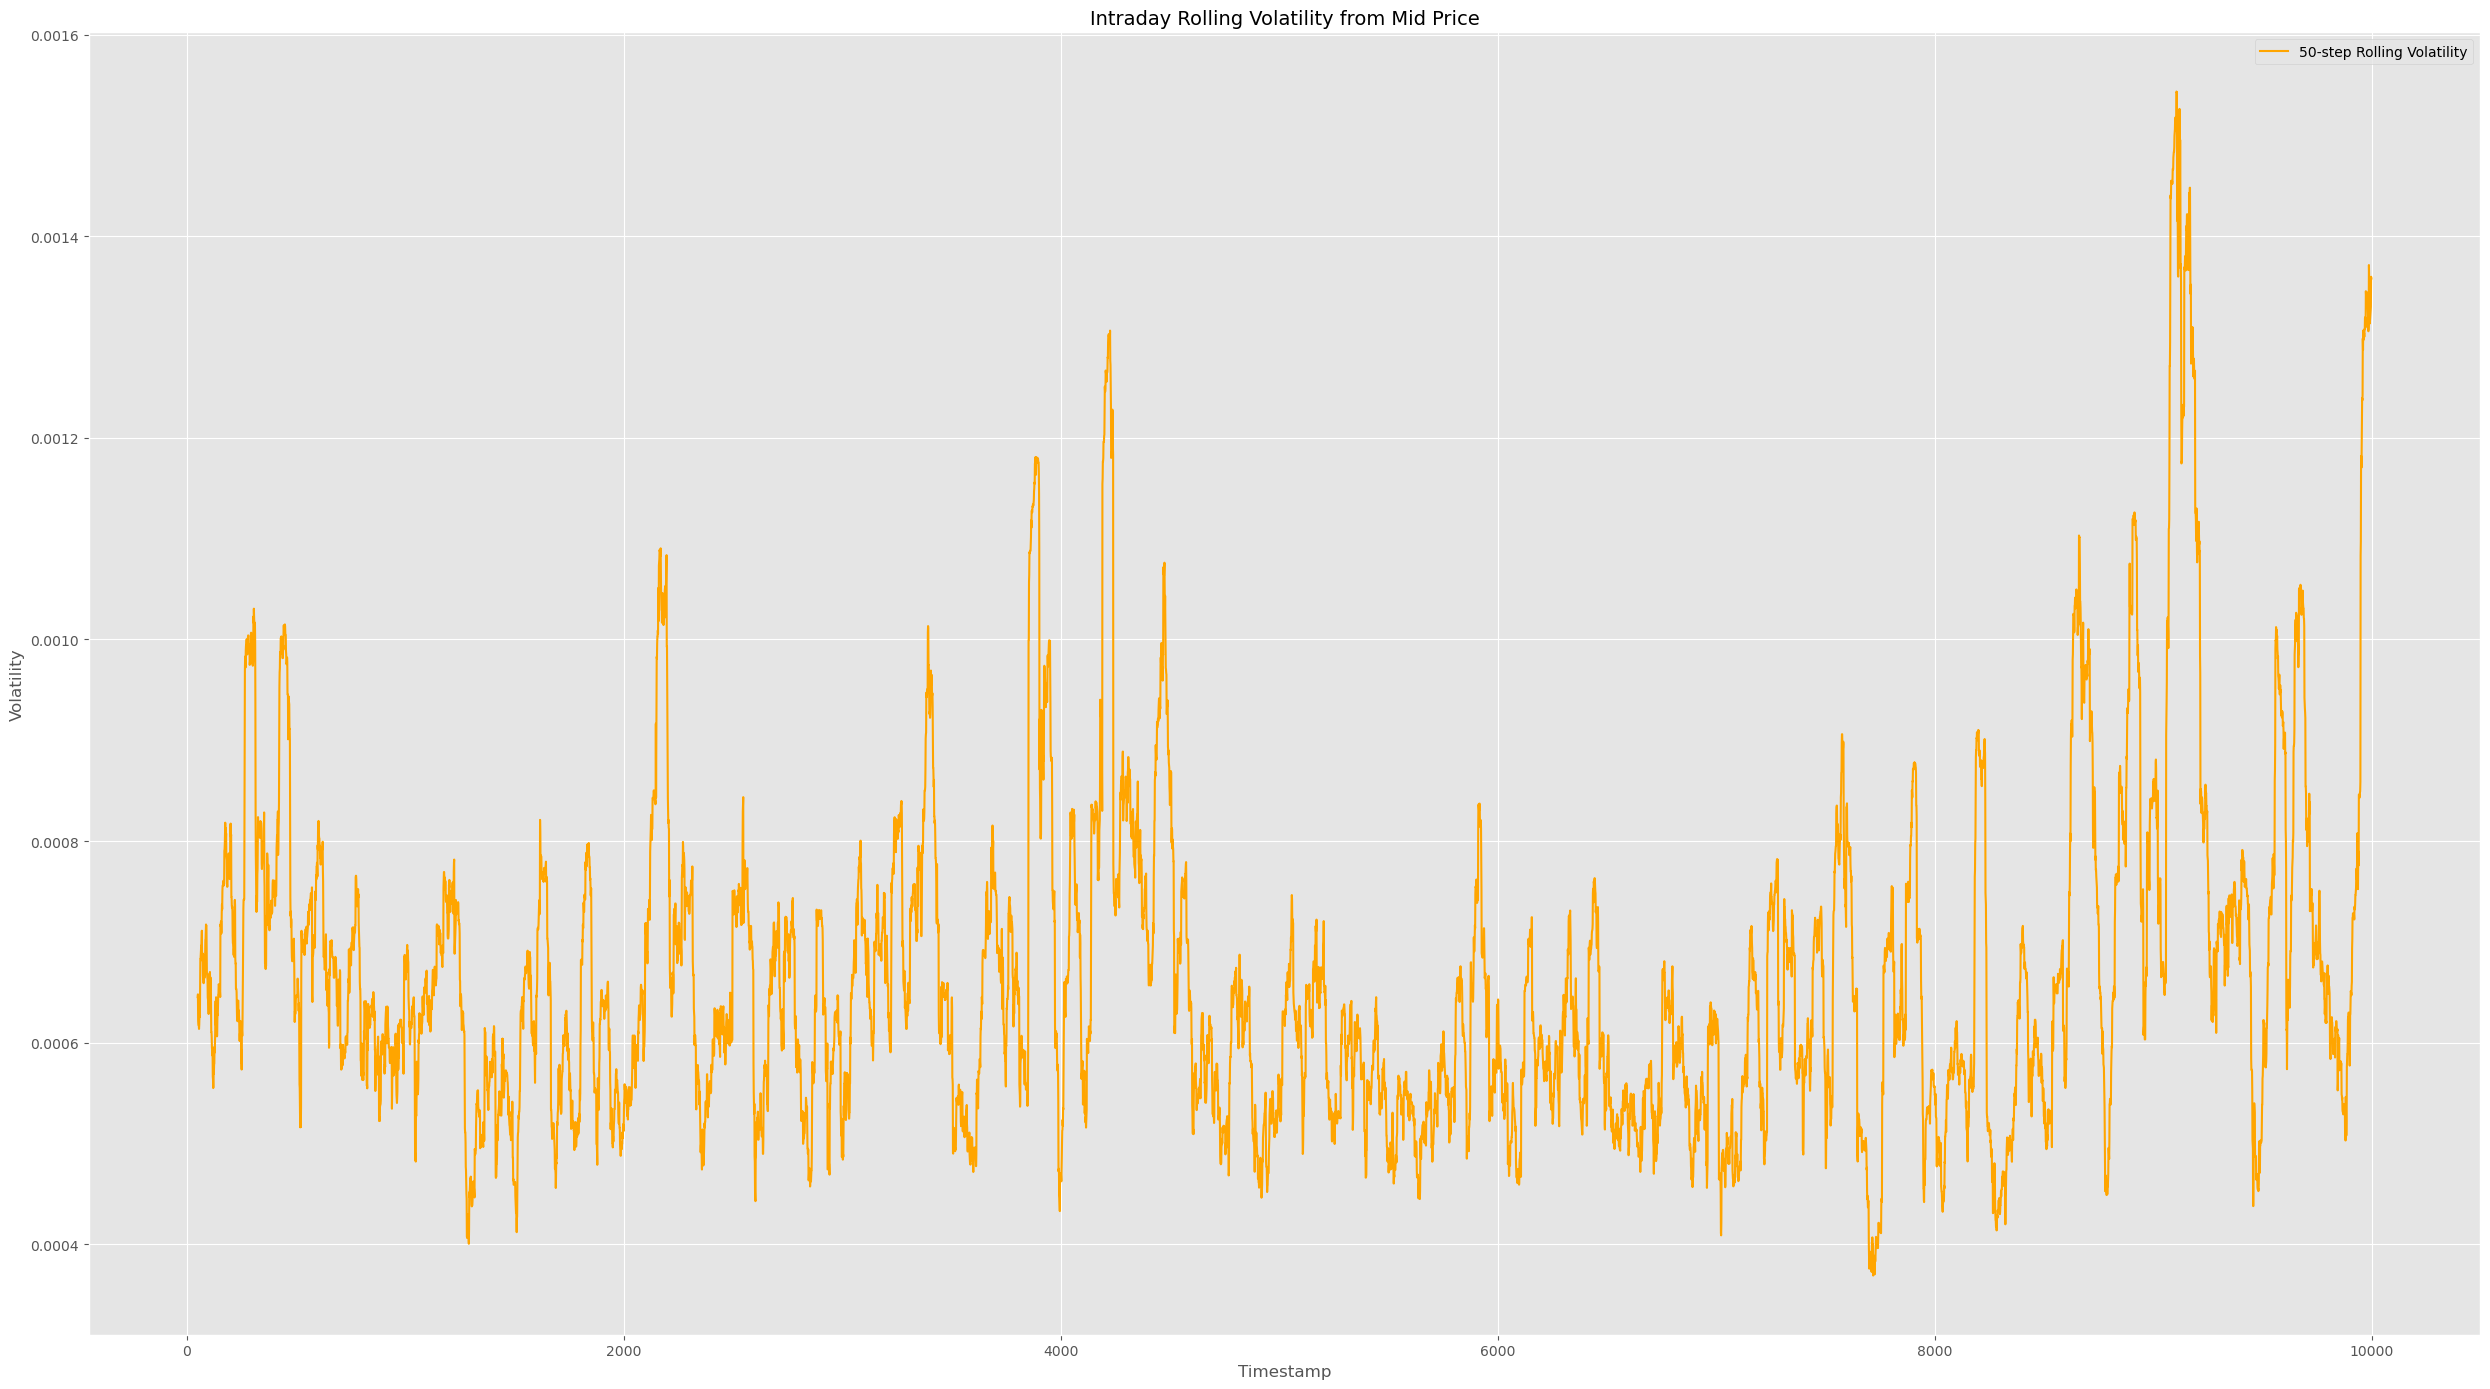

In [31]:
plt.figure(figsize=(25, 14))
plt.plot(prices['timestamp'], prices['volatility'], label=f'{window_size}-step Rolling Volatility', color='orange')
plt.title('Intraday Rolling Volatility from Mid Price')
plt.xlabel('Timestamp')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


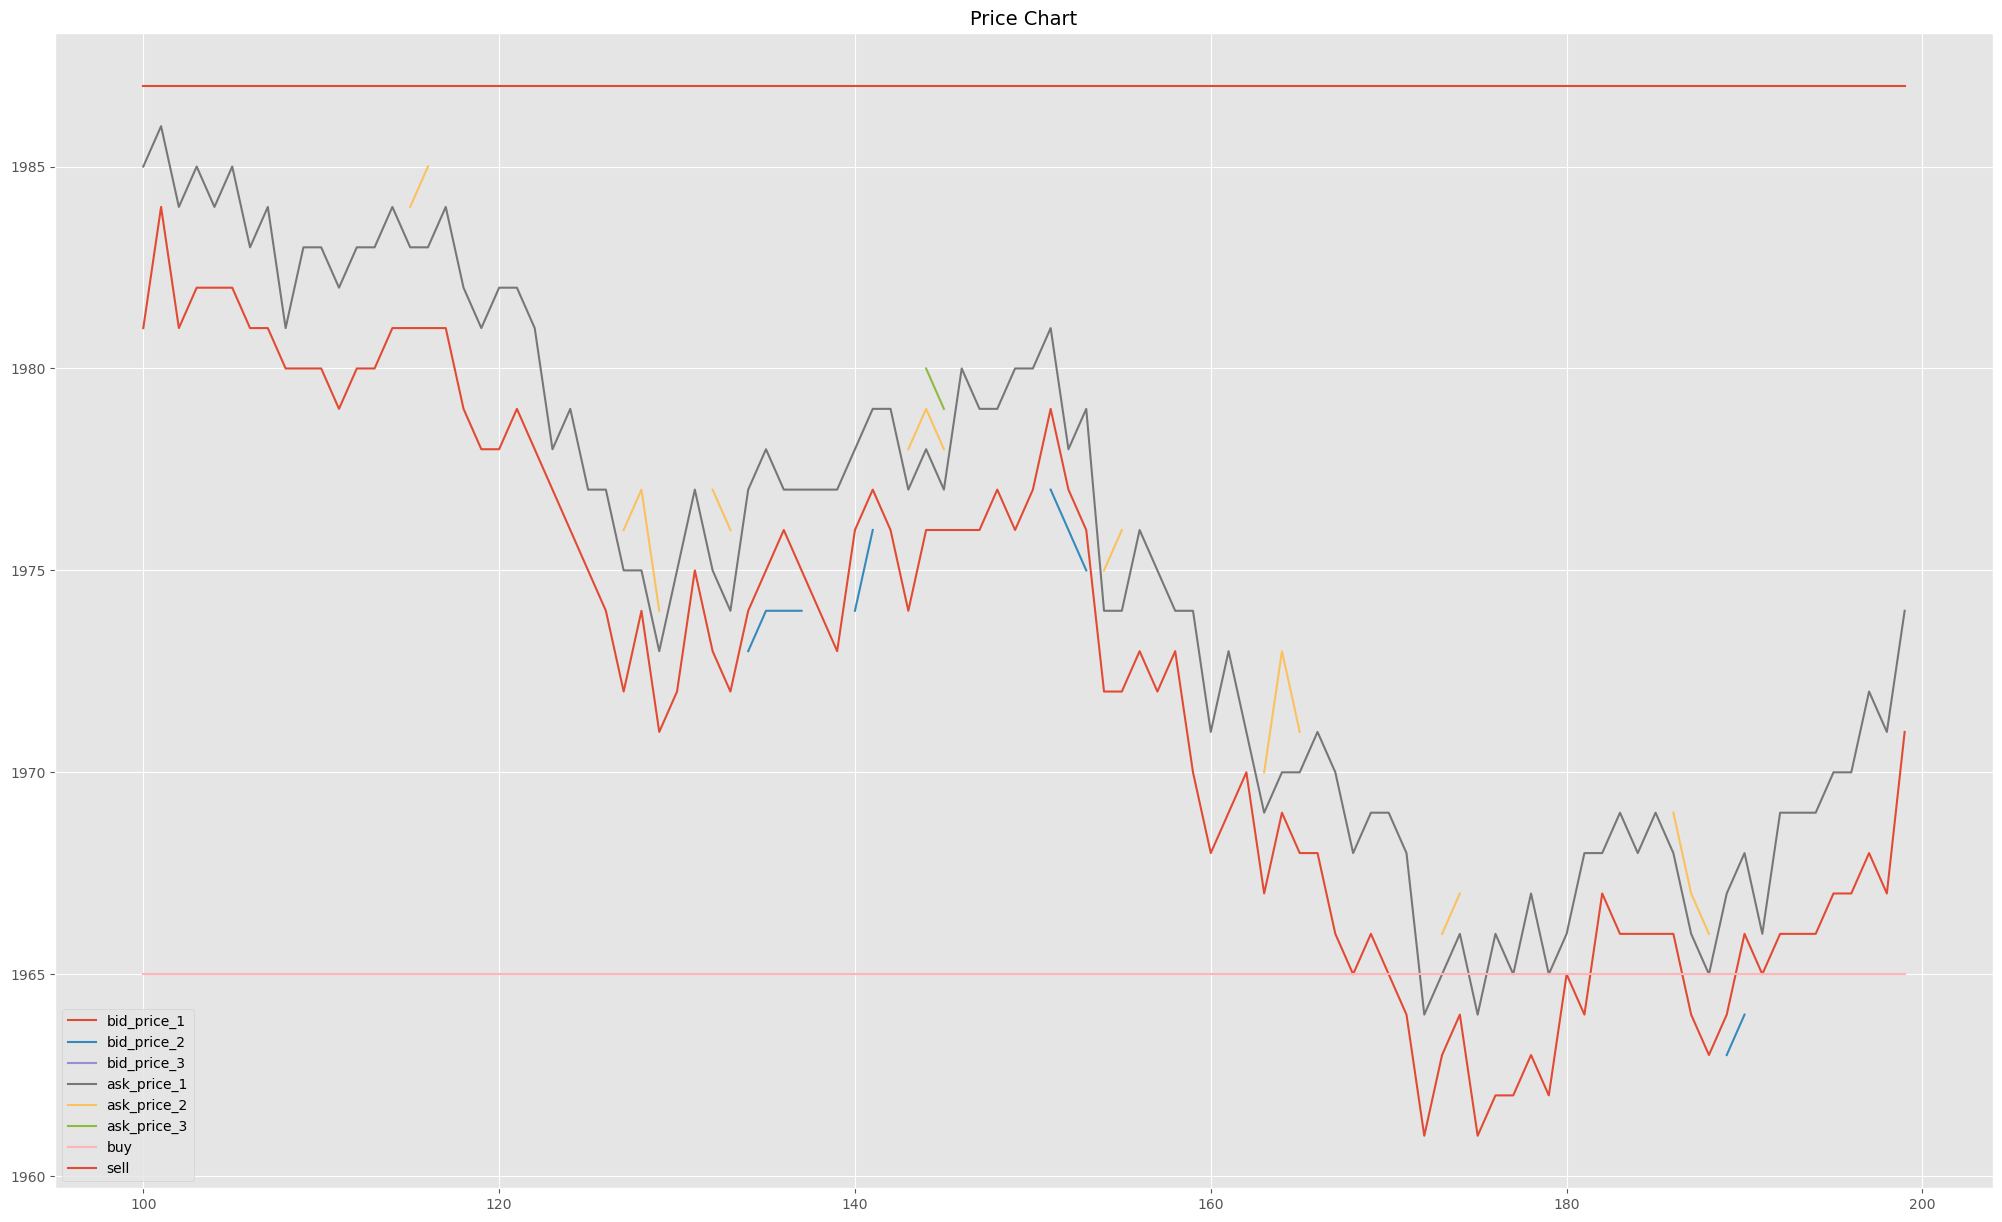

In [37]:
# slice
prices_sliced = prices[100:200]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 1987)
buy = np.full_like(ts, 1965)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    'buy': buy,
    'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

In [ ]:
since volatility is high , we can use bollinger band strategy

In [15]:
def SMA(prices,period):

  prices['20_day_SMA'] = prices['mid_price'].rolling(window=20).mean()

  return prices['20_day_SMA']

In [16]:
def calculate_bollinger_bands(prices, period=20, std_multiplier=2.0):
    # Assume you defined a SMA function somewhere
    middle_band = SMA(prices, period)
    
    # Calculate standard deviation
    std_deviation = np.std(prices[-period:], ddof=1)
    
    # Calculate upper and lower bands
    upper_band = middle_band + (std_multiplier * std_deviation)
    lower_band = middle_band - (std_multiplier * std_deviation)
    
    return upper_band, middle_band, lower_band
    